### Read in SOE test data, convert .parquet to .csv file

In [1]:
import pandas as pd
filepath_soe = "datasets/test_soe.parquet"
df = pd.read_parquet(filepath_soe)
df.to_csv("datasets/test_soe.csv", index=False)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UEN             13000 non-null  object 
 1   UEN_NO          13000 non-null  object 
 2   ECOM_REV        13000 non-null  float64
 3   B2B_PERC        13000 non-null  float64
 4   B2C_PERC        13000 non-null  float64
 5   RETURN_STATUS   13000 non-null  object 
 6   PROCESS_STATUS  13000 non-null  object 
 7   REF_YR          13000 non-null  object 
dtypes: float64(3), object(5)
memory usage: 914.1+ KB


In [3]:
df["ECOM_REV"].isnull().sum()

0

In [4]:
def process_dataframe(df):
    # Step 1: Subset UEN_NO, ECOM_REV from df
    df_subset = df[['UEN_NO', 'ECOM_REV']]
    
    # Step 2: Rename UEN_NO to UEN
    df_subset.rename(columns={'UEN_NO': 'UEN'}, inplace=True)
    
    # Step 3: Create new column "true_pred"
    df_subset['true_pred'] = df_subset['ECOM_REV'].apply(lambda x: 'C' if x > 0 else 'B')
    
    # Step 4: Drop ECOM_REV
    df_subset.drop(columns=['ECOM_REV'], inplace=True)
    
    return df_subset

In [5]:
df = process_dataframe(df)

/tmp/ipykernel_51946/2020824264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.rename(columns={'UEN_NO': 'UEN'}, inplace=True)
/tmp/ipykernel_51946/2020824264.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['true_pred'] = df_subset['ECOM_REV'].apply(lambda x: 'C' if x > 0 else 'B')
/tmp/ipykernel_51946/2020824264.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [6]:
df.head()

,UEN,true_pred
0,00641000J,B
1,04111800J,B
2,04155000E,B
3,04479200W,B
4,04559000A,B


In [7]:
df["true_pred"].value_counts()

true_pred
B    11531
C     1469
Name: count, dtype: int64

In [8]:
# save dataframe df
df.to_csv("datasets/soe_test.csv", index=False)

### Merge SOE test dataset with keyword counts for modelling

In [9]:
# import keyword_df
keyword_df = pd.read_csv("datasets/IE2023_keywordcounts.csv")
keyword_df.head()

,INDEX,NAME,UEN,WEBSITE,SOURCE,$,account,accreditation,add card,add to bag,...,vpn,wallet,web design,webdesign,what we do,wishlist,wix,woocommerce,youtube,sum
0,1,TRAFIGURA PTE LTD,199601595D,www.trafigura.com,ORBIS,6,5,4,4,4,...,4.0,4.0,4.0,4.0,18.0,4.0,4.0,4.0,4.0,4981.0
1,2,TRAFIGURA GROUP PTE. LTD.,201017488D,www.trafigura.com,ORBIS,6,5,4,4,4,...,4.0,4.0,4.0,4.0,18.0,4.0,4.0,4.0,4.0,4980.0
2,3,APPLE SOUTH ASIA PTE. LTD.,198903166R,www.apple.com,ORBIS,38,36,4,4,4,...,4.0,39.0,4.0,4.0,4.0,4.0,4.0,4.0,8.0,11423.0
3,4,WILMAR INTERNATIONAL LIMITED,199904785Z,www.wilmar-international.com,ORBIS,33,4,4,4,4,...,10.0,4.0,4.0,4.0,4.0,4.0,50.0,4.0,4.0,4823.0
4,5,TEMASEK HOLDINGS (PRIVATE) LIMITED,197401143C,www.temasek.com.sg,ORBIS,16,4,3,3,3,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,28.0,3588.0


In [10]:
def merge_dataframes(df, keyword_df):
    merged_df = pd.merge(df, keyword_df, on='UEN', how='inner')
    merged_df.drop(columns=['true_pred'], inplace=True)  # Drop the 'true_pred'
    return merged_df

In [11]:
data = merge_dataframes(df, keyword_df)
data.head()

,UEN,INDEX,NAME,WEBSITE,SOURCE,$,account,accreditation,add card,add to bag,...,vpn,wallet,web design,webdesign,what we do,wishlist,wix,woocommerce,youtube,sum
0,196000058W,6528,NAM WAN TEA CO. (PRIVATE) LTD.,tching.com,ORBIS,68,3,3,3,3,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,11.0,3542.0
1,196400122D,2531,INGERSOLL-RAND SOUTH EAST ASIA (PRIVATE) LIMITED,www.irco.com,ORBIS,8,1,1,1,1,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5369.0
2,197300451R,1568,HITACHI HIGH-TECH (SINGAPORE) PTE. LTD.,www.hitachi-hightech.com,ORBIS,12,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,676.0
3,197400260M,2380,NACHI SINGAPORE PRIVATE LIMITED.,www.nachinip.com.sg,ORBIS,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,219.0
4,197400730G,554,SIIX SINGAPORE PTE. LTD.,www.siix.co.jp,ORBIS,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1878.0


In [12]:
len(data)

2381

In [13]:
# save to csv
data.to_csv("datasets/for_pred.csv", index=False)

### Import classified dataset, merge back with true labels & run classification report.

In [14]:
pred = pd.read_csv('datasets/soe_classifiedv1.csv')
pred = pred[["UEN", "pred_label"]]
pred.head()

,UEN,pred_label
0,196000058W,C
1,196400122D,B
2,197300451R,B
3,197400260M,B
4,197400730G,B


In [15]:
len(pred)

2381

In [16]:
# merge with true predictions
merged_df = pd.merge(df, pred, on='UEN', how='inner')
merged_df.head()

,UEN,true_pred,pred_label
0,196000058W,B,C
1,196400122D,B,B
2,197300451R,B,B
3,197400260M,B,B
4,197400730G,B,B


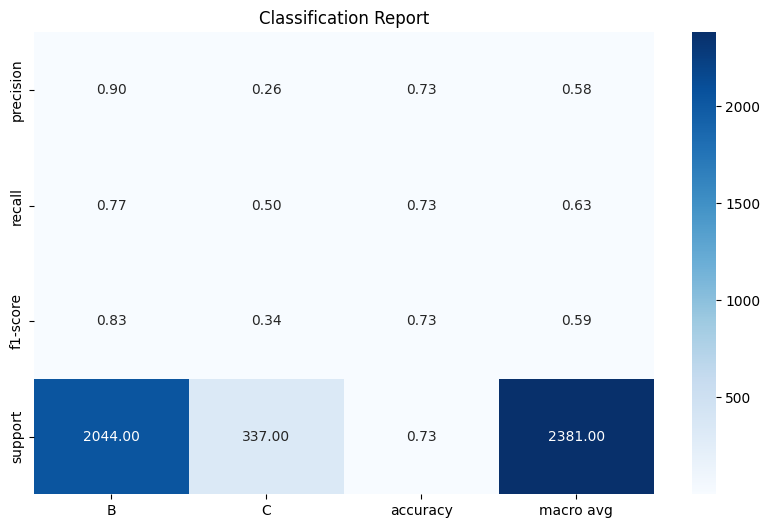

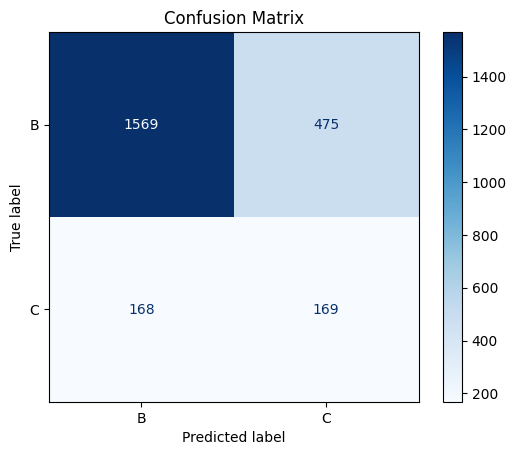

(0.7299454010919781,
               precision    recall  f1-score      support
 B              0.903282  0.767613  0.829939  2044.000000
 C              0.262422  0.501484  0.344546   337.000000
 accuracy       0.729945  0.729945  0.729945     0.729945
 macro avg      0.582852  0.634548  0.587243  2381.000000
 weighted avg   0.812576  0.729945  0.761238  2381.000000)

In [19]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(merged_df):
    # Extract true labels and predicted labels
    y_true = merged_df['true_pred']
    y_pred = merged_df['pred_label']
    
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Generate classification report
    class_report = classification_report(y_true, y_pred, output_dict=True)
    
    # Convert classification report to DataFrame for better visualization
    class_report_df = pd.DataFrame(class_report).transpose()
    
    # Plot classification report
    plt.figure(figsize=(10, 6))
    sns.heatmap(class_report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
    plt.title('Classification Report')
    plt.show()
    
    # Plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()
    
    return accuracy, class_report_df

# Example usage:
evaluate_model(merged_df)

In [20]:
merged_df["true_pred"].value_counts(normalize=True)

true_pred
B    0.858463
C    0.141537
Name: proportion, dtype: float64

In [ ]:
# conclusion: unlikely that "2021 ML model" overestimated the proportion of class "C" labels in 2023. 
# Next step: Check-in on 2022 results.
# Potential solution: Train RF model on 2021 data, predict 2022 data (firms with websites - B & C), re-run imputation steps.